In [101]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [102]:
nPerClust = 300
blur = 1

A = [1,1]
B = [5, 1]
C = [4, 3]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

labels_np = np.hstack((np.zeros((nPerClust)), np.ones((nPerClust)), 1+np.ones((nPerClust))))

data_np = np.vstack((np.array(a).T, np.array(b).T, np.array(c).T))

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()


In [103]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2)

datasetTrain = TensorDataset(X_train, y_train)
datasetTest = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(datasetTrain, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(datasetTest, batch_size=datasetTest.tensors[0].shape[0])

In [104]:
def creatModel(L2lambda):
    class ANN(nn.Module):
        def __init__(self):
            super().__init__()
            self.input = nn.Linear(2,8)

            self.fc1 = nn.Linear(8,8)

            self.output = nn.Linear(8,3)



        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            return self.output(x)
    net = ANN()
    
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=.001, weight_decay=L2lambda)
    
    return net, lossfun, optimizer

def trainModel(ann, lossfun, optimizer):
    testAcc = []
    trainAcc = []
    for epoch in range(50):
        ann.train()
        batchAcc = []
        for X,y in train_loader:
            
            y_pred = ann(X)
            
            loss = lossfun(y_pred,y)
            
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            batchAcc.append(100*(torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item()))
            
        trainAcc.append(np.mean(batchAcc))    
            
        ann.eval()
        X,y = next(iter(test_loader))
        with torch.no_grad():
            y_pred = ann(X)
            
        testAcc.append(100*(torch.mean((torch.argmax(y_pred, axis=1) == y).float()).item()))
        
    return trainAcc, testAcc


In [105]:

lrs = np.logspace(-4, -1, 6)
train = []
test = []

for lr in lrs:
    net, lossfun, optimizer = creatModel(lr)
    a = trainModel(net, lossfun, optimizer)
    train.append(a[0])
    test.append(a[1])

In [106]:
train = np.array(train)
test = np.array(test)

In [107]:
train

array([[38.63636364, 47.01704545, 51.5625    , 52.55681818, 54.54545455,
        54.82954545, 55.68181818, 60.36931818, 70.59659091, 74.00568182,
        79.11931818, 78.97727273, 82.38636364, 83.23863636, 84.09090909,
        84.94318182, 86.36363636, 87.35795455, 87.5       , 88.21022727,
        88.06818182, 88.06818182, 88.92045455, 89.20454545, 88.92045455,
        89.34659091, 89.34659091, 88.77840909, 89.34659091, 89.34659091,
        89.91477273, 89.20454545, 89.20454545, 89.48863636, 89.20454545,
        89.34659091, 89.20454545, 89.48863636, 89.63068182, 89.20454545,
        89.63068182, 89.77272727, 89.0625    , 89.91477273, 89.77272727,
        89.48863636, 89.63068182, 89.20454545, 90.34090909, 89.34659091],
       [33.38068182, 33.38068182, 34.375     , 47.72727273, 53.69318182,
        58.94886364, 62.78409091, 64.91477273, 69.17613636, 72.44318182,
        78.40909091, 83.09659091, 83.66477273, 85.9375    , 86.78977273,
        88.06818182, 88.63636364, 88.21022727, 88.

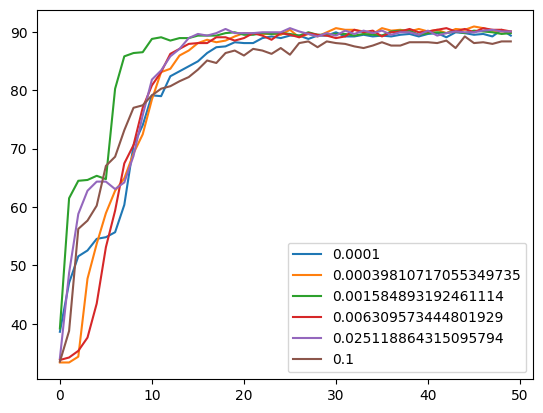

In [108]:
plt.plot(train.T)
plt.legend(lrs)

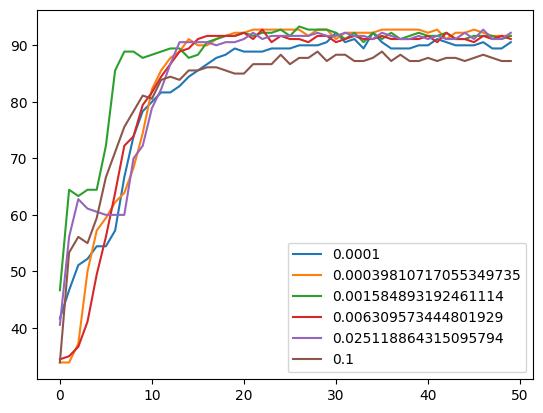

In [109]:
plt.plot(test.T)
plt.legend(lrs)